In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [2]:
import matplotlib.pyplot as plt

# 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import matplotlib.pyplot as plt

# 폰트 설정
import matplotlib.font_manager as fm
# 폰트 설정
font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 1. 데이터셋 다운로드 및 압축 해제
!wget -c http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar xzf food-101.tar.gz


In [2]:

# 2. 라이브러리 불러오기
import os, glob
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# 3. 클래스 및 이미지 샘플링 (5개 클래스 x 30장)
food_labels = sorted(os.listdir('food-101/images'))
sample_classes = food_labels[:5]
sample_paths, sample_labels = [], []
for idx, cls in enumerate(sample_classes):
    files = glob.glob(f'food-101/images/{cls}/*.jpg')[:30]
    sample_paths += files
    sample_labels += [idx]*len(files)


In [3]:
import torch
if torch.backends.mps.is_available():
    device = torch.device("mps")  # Mac M-series GPU
elif torch.cuda.is_available():
    device = torch.device("cuda")  # NVIDIA GPU
else:
    device = torch.device("cpu")   # CPU fallback

/Users/kwangsiklee/miniforge3/envs/hf_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kwangsiklee/miniforge3/envs/hf_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_56074/1146381300.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs, labels = imgs.to(device), to

Epoch 1: Loss=1.6680
Epoch 2: Loss=0.8777
Epoch 3: Loss=0.9634

테스트 정확도: 36.67%


/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_56074/1146381300.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs, labels = imgs.to(device), torch.tensor(labels).to(device)
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_56074/1146381300.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs, labels = imgs.to(device), torch.tensor(labels).to(device)
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_56074/1146381300.py:82: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_56074/1146381300.py:82: UserWarning: Glyph 51228 (\N{HANGUL SY

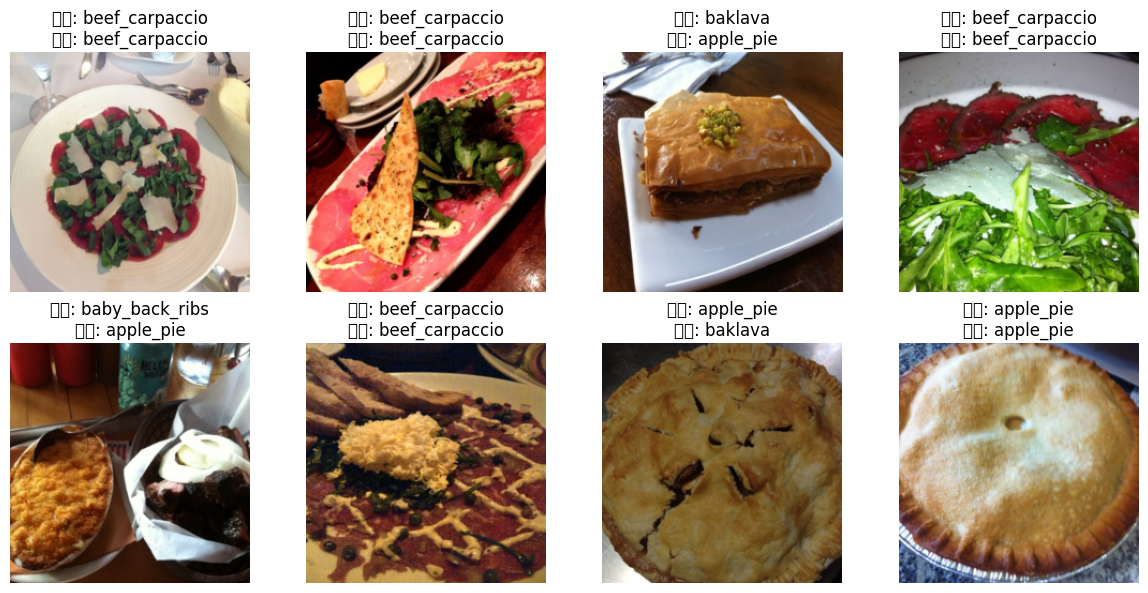

In [9]:

# 4. Dataset/DataLoader 정의
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

class FoodDataset(Dataset):
    def __init__(self, image_paths, labels, transform):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.image_paths)
    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        label = self.labels[idx]
        return img, label

paths_train, paths_test, labels_train, labels_test = train_test_split(
    sample_paths, sample_labels, test_size=0.2, stratify=sample_labels, random_state=42)

train_ds = FoodDataset(paths_train, labels_train, transform)
test_ds = FoodDataset(paths_test, labels_test, transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

# 5. ResNet18 CNN 분류모델 준비
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, len(sample_classes))
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 6. 학습
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), torch.tensor(labels).to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss={total_loss/len(train_loader):.4f}")

# 7. 평가
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), torch.tensor(labels).to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(f"\n테스트 정확도: {100*correct/total:.2f}%")

# 8. 예측 샘플 시각화
class_map = {i:cls for i,cls in enumerate(sample_classes)}
imgs, labels = next(iter(test_loader))
imgs, labels = imgs.to(device), torch.tensor(labels).to(device)
model.eval()
with torch.no_grad():
    outputs = model(imgs)
    preds = torch.argmax(outputs, 1)

plt.figure(figsize=(12,6))
for i in range(8):
    img = imgs[i].cpu().permute(1,2,0).numpy()*0.5 + 0.5  # unnormalize
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.title(f"실제: {class_map[labels[i].item()]}\n예측: {class_map[preds[i].item()]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-2220201183.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs, labels = imgs.to(device), torch.tensor(labels).to(device)


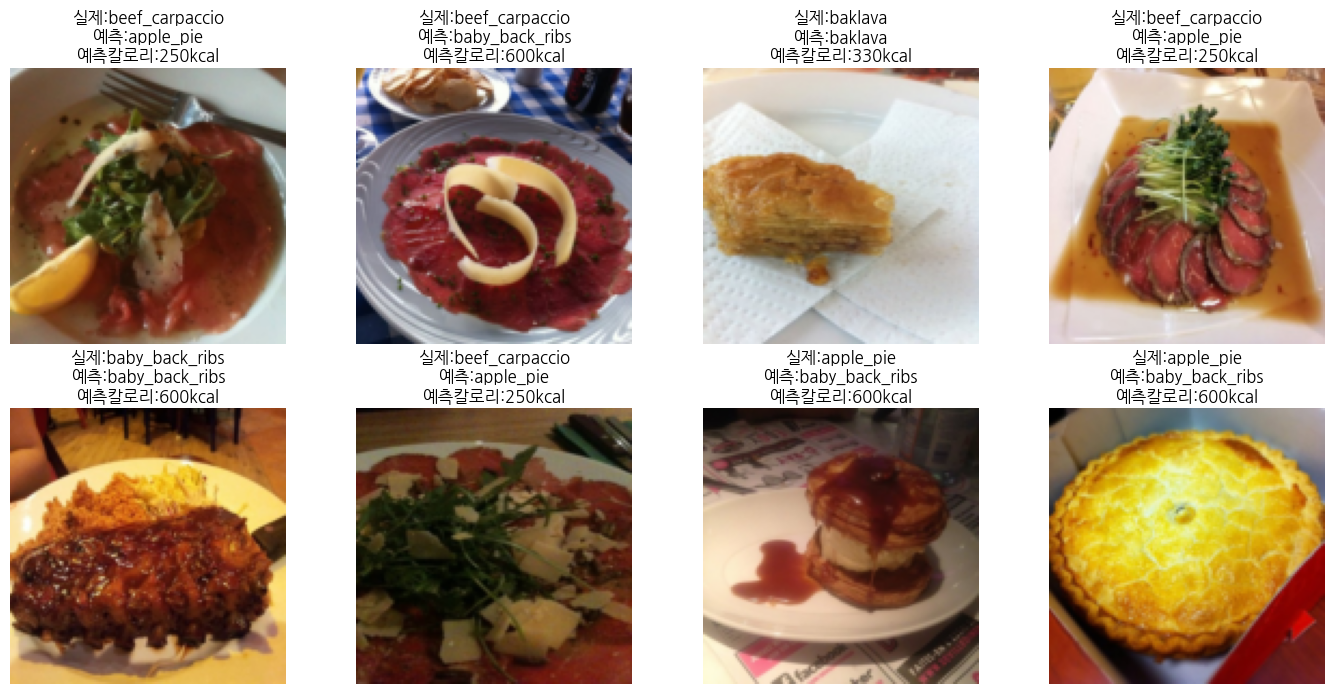

칼로리 예측 MAE: 156.25 kcal
칼로리 예측 R2: -1.519


In [4]:
# 1️⃣ (추가) 음식별 평균 칼로리 사전(예시)
# 실제 칼로리 정보가 있다면 공식 DB를 활용, 아래는 임의 예시
calorie_dict = {
    sample_classes[0]: 250,  # 예: 'apple_pie': 250 kcal
    sample_classes[1]: 600,  # 예: 'baby_back_ribs': 600 kcal
    sample_classes[2]: 330,  # ...
    sample_classes[3]: 420,
    sample_classes[4]: 200
}

# 2️⃣ (수정) 예측 샘플 시각화 + 칼로리 예측
class_map = {i:cls for i,cls in enumerate(sample_classes)}
imgs, labels = next(iter(test_loader))
imgs, labels = imgs.to(device), torch.tensor(labels).to(device)
model.eval()
with torch.no_grad():
    outputs = model(imgs)
    preds = torch.argmax(outputs, 1)

plt.figure(figsize=(14,7))
for i in range(8):
    img = imgs[i].cpu().permute(1,2,0).numpy()*0.5 + 0.5  # unnormalize
    pred_cls = class_map[preds[i].item()]
    gt_cls = class_map[labels[i].item()]
    pred_cal = calorie_dict[pred_cls]
    gt_cal = calorie_dict[gt_cls]
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.title(f"실제:{gt_cls}\n예측:{pred_cls}\n예측칼로리:{pred_cal}kcal")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3️⃣ (추가) 테스트셋 전체 평균 칼로리 예측 성능 통계
y_true_cals = [calorie_dict[class_map[label.item()]] for label in labels]
y_pred_cals = [calorie_dict[class_map[pred.item()]] for pred in preds]
from sklearn.metrics import mean_absolute_error, r2_score
print(f"칼로리 예측 MAE: {mean_absolute_error(y_true_cals, y_pred_cals):.2f} kcal")
print(f"칼로리 예측 R2: {r2_score(y_true_cals, y_pred_cals):.3f}")